In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import locale
from IPython.display import display, HTML

In [2]:
locale.setlocale(locale.LC_ALL, '')

#espera-se que o arquivo tenha apenas um fornedor
arq_pagamentos = '/home/lcreina/programacao/python/jupyter/cgu/covid_2020/empresas/licimaster/pagamentos.tcm.ba.licimaster.2020_saida.xlsx'

In [3]:
df_pagamentos = pd.read_excel(arq_pagamentos,
                      header=1,
                      index_col=None,
                      names=['municipio','unidade','exercicio_pagamento',\
                             'empenho','dotacao','processo','credor',\
                             'cpf_cnpj','data_empenho','data_pagamento',\
                             'valor_liquido','valor_retencao','valor_bruto',\
                             'conta_nome','banco','agencia','numero_conta',\
                             'documento','rp','contrato','licitacao',\
                             'fonte_recursos','elemento_despesa','historico'],
                      parse_dates = ['data_empenho','data_pagamento']
                      )
df_pagamentos.credor = df_pagamentos.credor[0]
df_pagamentos.dtypes


municipio                      object
unidade                        object
exercicio_pagamento             int64
empenho                         int64
dotacao                        object
processo                       object
credor                         object
cpf_cnpj                        int64
data_empenho           datetime64[ns]
data_pagamento         datetime64[ns]
valor_liquido                 float64
valor_retencao                  int64
valor_bruto                   float64
conta_nome                     object
banco                          object
agencia                        object
numero_conta                   object
documento                      object
rp                             object
contrato                       object
licitacao                      object
fonte_recursos                  int64
elemento_despesa                int64
historico                      object
dtype: object

,Município,Qt Pagamentos,Valor Pago
1,Salvador,32,"11.264.514,62"
2,Catu,22,"177.188,19"
3,Santo Antonio de Jesus,7,"49.154,03"
4,Pojuca,7,"51.863,41"
5,Fundação Hospitalar de Feira de Santana,5,"67.470,00"
6,Vitoria da Conquista,3,"25.903,80"
7,Utinga,2,"16.660,00"
8,Tapiramuta,2,"64.000,00"
9,Piripa,2,"133.280,00"
10,Amargosa,2,"588,00"


,Município,Qt Pagamentos,Valor Pago
1,Salvador,32,"11.264.514,62"
2,Camaçari,1,"198.000,00"
3,Catu,22,"177.188,19"
4,Piripa,2,"133.280,00"
5,Fundação Hospitalar de Feira de Santana,5,"67.470,00"
6,Tapiramuta,2,"64.000,00"
7,Pojuca,7,"51.863,41"
8,Santo Antonio de Jesus,7,"49.154,03"
9,Vitoria da Conquista,3,"25.903,80"
10,Anage,1,"23.200,00"


<AxesSubplot:title={'center':'Pagamentos - Valor Pago'}, xlabel='Município'>

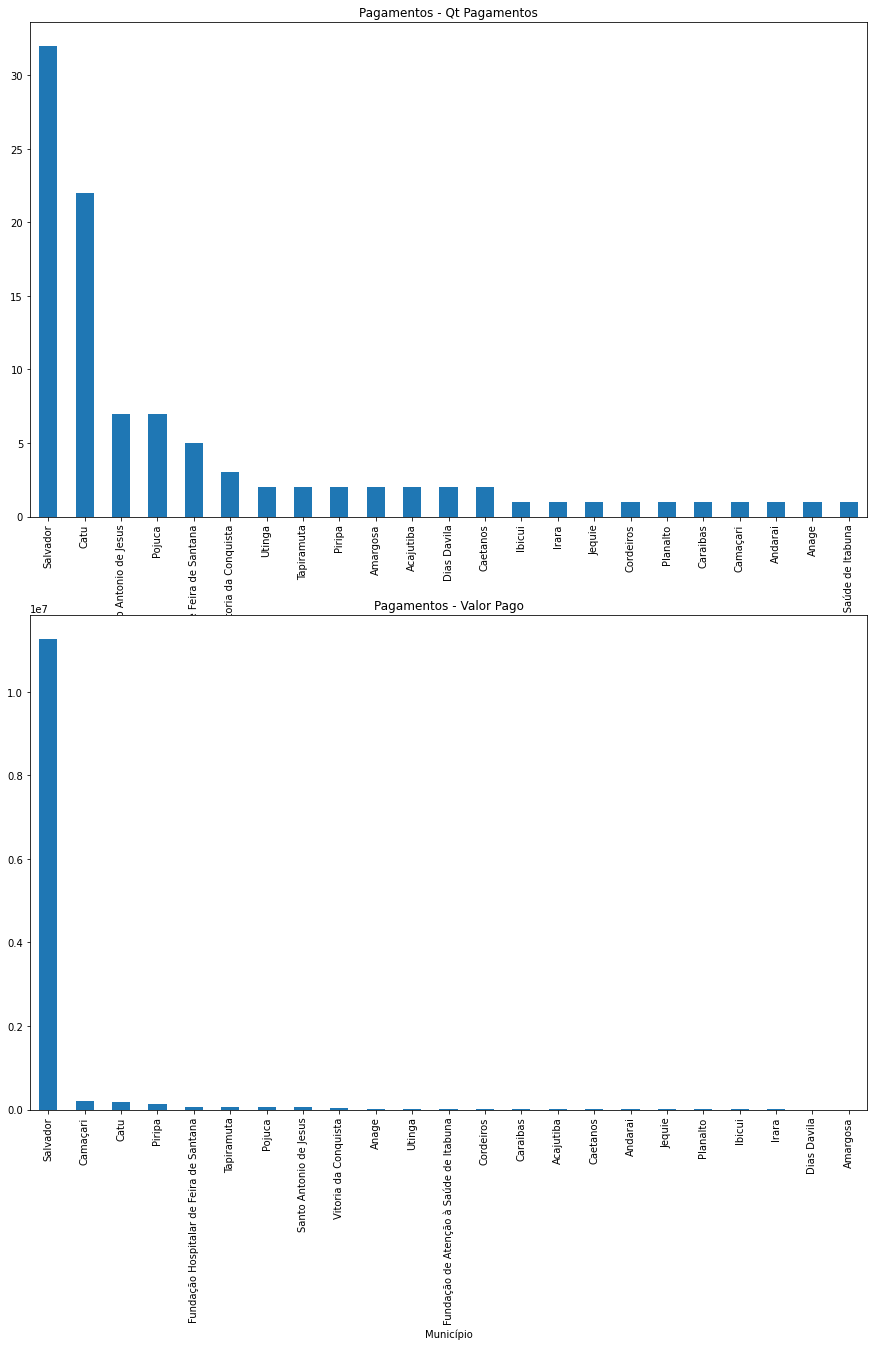

In [4]:
#pagamentos ordenados pela quantidade de pagamentos
df = df_pagamentos.groupby(df_pagamentos.municipio)
df = df.agg({'processo':'count','valor_bruto':'sum'})
df.sort_values(by=['processo'],ascending=False,inplace=True)
df  = df.reset_index()
df.index += 1
#formatando o data frame para apresentação
df.columns = ['Município','Qt Pagamentos', 'Valor Pago']
estilo = {'Valor Pago'      : lambda x: f'{locale.format_string("%.2f", x, True)}'}
df_style = df.style.format(estilo) #.style.hide_index()
display(HTML(f'<p> Pagamentos ordenados pela Quantidade</p>'))
display(df_style)

fig,axes = plt.subplots(2,1,figsize=(15,20))
df.plot(kind='bar',x='Município',y='Qt Pagamentos',ax=axes[0],legend=False,title='Pagamentos - Qt Pagamentos')

#pagamentos ordenados pelo valor pago
df = df_pagamentos.groupby(df_pagamentos.municipio)
df = df.agg({'processo':'count','valor_bruto':'sum'})
df.sort_values(by=['valor_bruto'],ascending=False,inplace=True)
df  = df.reset_index()
df.index += 1
#formatando o data frame para apresentação
df.columns = ['Município','Qt Pagamentos', 'Valor Pago']
estilo = {'Valor Pago'      : lambda x: f'{locale.format_string("%.2f", x, True)}'}
df_style = df.style.format(estilo) #.style.hide_index()
display(HTML(f'<p> Pagamentos ordenados pelo Valor Pago</p>'))
display(df_style)
df.plot(kind='bar',x='Município',y='Valor Pago',ax=axes[1],legend=False,title='Pagamentos - Valor Pago')



23

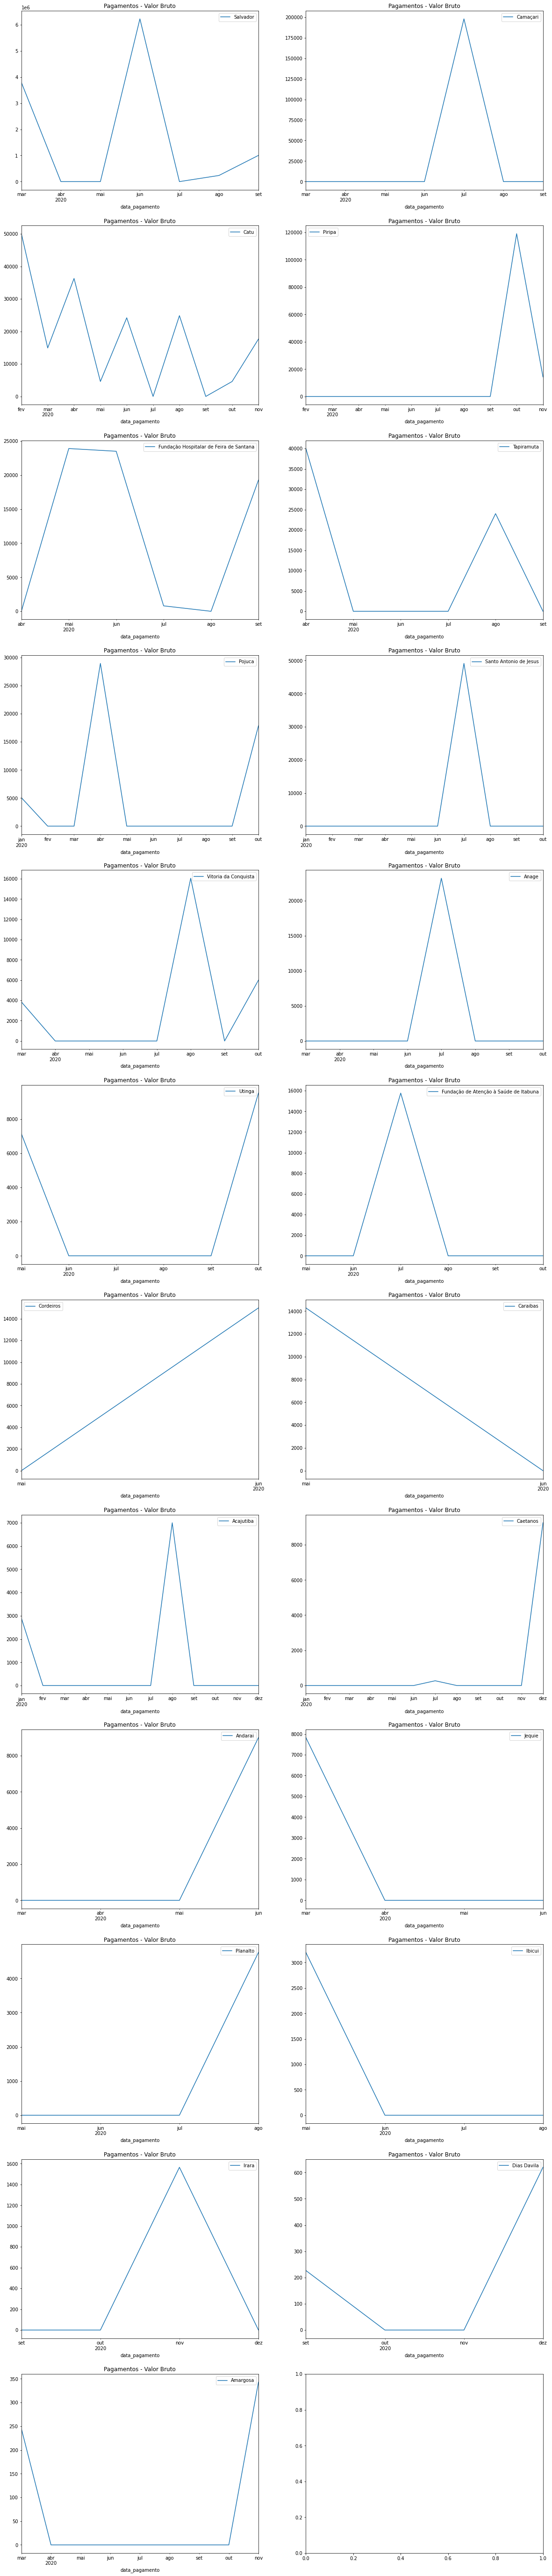

In [49]:
df = df_pagamentos.groupby(df_pagamentos.municipio)
df = df.agg({'processo':'count','valor_bruto':'sum'})
df.sort_values(by=['valor_bruto'],ascending=False,inplace=True)
df  = df.reset_index()
df.index += 1
df_municipios = df.municipio 
#display(df_municipios)
#df_municipios.drop_duplicates(inplace=True)  #caso fosse necessário eliminar as duplicatas

df_municipios = df_municipios.reset_index(drop=True)

qt_graf_por_linha = 2

if df_municipios.shape[0] % qt_graf_por_linha: #calcula quantidade de linhas de gráficos
    linhas = (df_municipios.shape[0]// qt_graf_por_linha)  + 1 
else:
    linhas = df_municipios.shape[0]// qt_graf_por_linha
              
fig,axes = plt.subplots(linhas,qt_graf_por_linha,figsize=(20,100))
#fig,axes = plt.subplots(1,1,figsize=(15,20))

display(df_municipios.shape[0]       )
linha_atual = 0

    
for i in range(0,df_municipios.shape[0],qt_graf_por_linha):
    filtro = list(df_municipios[i:i+qt_graf_por_linha])
    df = df_pagamentos[df_pagamentos.municipio.isin(filtro)][['municipio','data_pagamento','valor_bruto']]    
    df = pd.crosstab(df.data_pagamento,df.municipio,values=df.valor_bruto,aggfunc='sum').fillna(0)
    g = df.groupby(pd.Grouper(freq="M"))
    for col in range(len(filtro)):
        g[filtro[col]].sum().plot(kind='line',ax=axes[linha_atual][col],legend=True,title='Pagamentos - Valor Bruto')
        
    linha_atual += 1
    
    
